In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tslearn.datasets import UCR_UEA_datasets
import sklearn
import pickle
import numpy as np 
import torch 
from TSInterpret_Artifacts.ClassificationModels.CNN_T import ResNetBaseline, UCRDataset, fit
import warnings
warnings.filterwarnings("ignore") 

from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from pyts.classification import LearningShapelets
from pyts.utils import windowed_view

import pyts

In [2]:
# Plot single Time Series with Label
def plot_ts(ts_sample):
    ts= ts_sample
    plt.figure(figsize=(10, 4))
    plt.plot(ts, label="Time Series", color='blue')
    plt.title(f"Time Series")
    plt.xlabel("Time Steps")
    plt.ylabel("Value")

    # Display grid and legend
    plt.grid(False)
    # plt.legend()
    plt.show()


def scale_dataset(traindata, testdata):
    minmaxscaler = MinMaxScaler()
    minmaxscaler.fit(traindata.reshape(-1, 1))

    scaled_traindata = minmaxscaler.transform(traindata.reshape(-1, 1)).reshape(-1, 286, 1)
    scaled_testdata = minmaxscaler.transform(testdata.reshape(-1, 1)).reshape(-1, 286, 1)
    return scaled_traindata, scaled_testdata

In [10]:
dataset='Coffee'
train_x, train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)

train_x_scaled, test_x_scaled = scale_dataset(train_x, test_x)

train_x_scaled = train_x_scaled.reshape(-1, 286)
test_x_scaled = test_x_scaled.reshape(-1, 286)

In [40]:
clf = LearningShapelets(random_state=42, n_shapelets_per_size=4, min_shapelet_length=20, shapelet_scale=1, learning_rate=0.01)
clf.fit(train_x_scaled, train_y)

LearningShapelets(learning_rate=0.01, min_shapelet_length=20,
                  n_shapelets_per_size=4, random_state=42, shapelet_scale=1)

In [41]:
clf.score(test_x_scaled, test_y)

0.4642857142857143

In [ ]:
clf.ind

In [42]:
len(clf.shapelets_[0])

4

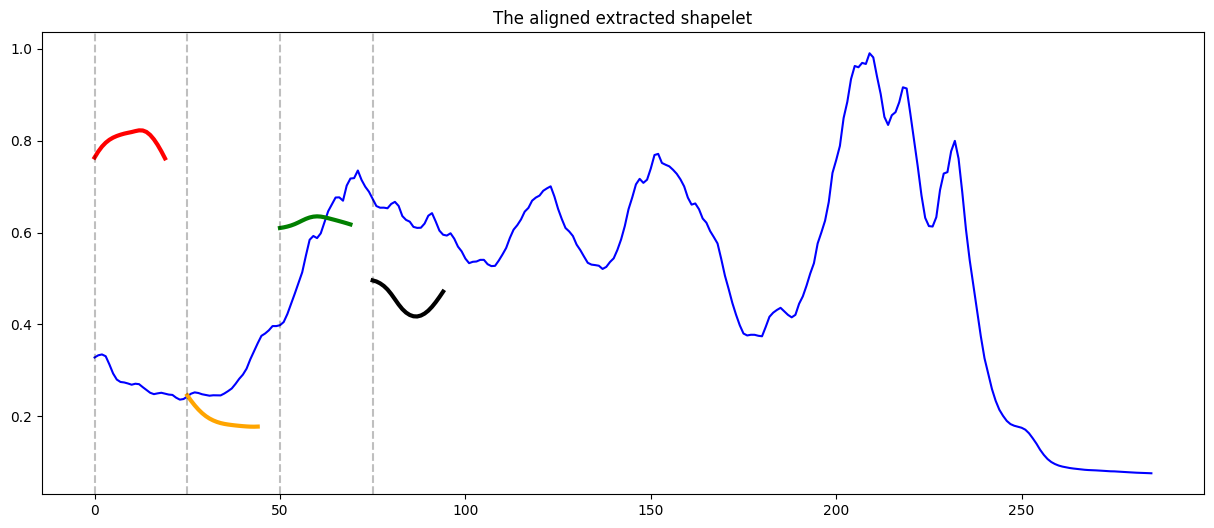

In [43]:
predicted_locations = [0, 25, 50, 75]
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the shapelet and align it on the best matched time series. The optimizer
# will often enlarge the shapelet to create a larger gap between the distances
# of both classes. We therefore normalize the shapelet again before plotting.

test_ts_id = 10 #np.argmin(np.sum(distances, axis=1))
id_shap = 0

colors = ["red", "orange", "green", "black", "purple"]

ax.plot(train_x_scaled[test_ts_id].ravel(), color='blue')
for id_shap in range(len(clf.shapelets_[0])):
    shap = clf.shapelets_[0][id_shap]
    #shap = TimeSeriesScalerMinMax().fit_transform(shap.reshape(1, -1, 1)).flatten()
    pos = predicted_locations[id_shap]
    ax.plot(np.arange(pos, pos + len(shap)), shap, linewidth=3, color=colors[id_shap])
    ax.axvline(pos, color='k', linestyle='--', alpha=0.25)
    ax.set_title("The aligned extracted shapelet")